In [2]:
import pickle

import numpy as np

from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D

In [3]:
with open('preprocessed_emojis.pkl', 'rb') as f:
    preprocessed_emojis = pickle.load(f)

print (f'Imagenes cargadas: {len(preprocessed_emojis)}')

Imagenes cargadas: 2530


In [4]:
# Organiza los datos en matrices numpy
labels = ['Angry', 'Happy', 'Poo', 'Sad', 'Surprised']

X = np.array([img.flatten() for img, label in preprocessed_emojis])
y = np.array([labels.index(label) for img, label in preprocessed_emojis])

print("Forma de X:", X.shape)
print("Forma de y:", y.shape)

Forma de X: (2530, 1024)
Forma de y: (2530,)


In [5]:
# Divide los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)
y_train_cat = to_categorical(y_train, num_classes=len(labels))
y_test_cat = to_categorical(y_test, num_classes=len(labels))

print("Forma de X_train:", X_train.shape)
print("Forma de y_train:", y_train_cat.shape)
print("Forma de X_test:", X_test.shape)
print("Forma de y_test:", y_test_cat.shape)

Forma de X_train: (2024, 1024)
Forma de y_train: (2024, 5)
Forma de X_test: (506, 1024)
Forma de y_test: (506, 5)


In [6]:
# Con las imágenes binarias, ajusta un modelo MLP y evalúa su rendimiento.
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(len(labels), activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train_cat, epochs=20, batch_size=32, validation_split=0.2)
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
print(classification_report(y_test, y_pred_classes, target_names=labels))

c:\Users\oswal\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.4429 - loss: 8.7241 - val_accuracy: 0.5358 - val_loss: 2.5445
Epoch 2/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6461 - loss: 1.4880 - val_accuracy: 0.5852 - val_loss: 2.0429
Epoch 3/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7634 - loss: 0.7036 - val_accuracy: 0.6370 - val_loss: 1.6406
Epoch 4/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8567 - loss: 0.4119 - val_accuracy: 0.6296 - val_loss: 1.4451
Epoch 5/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9098 - loss: 0.2660 - val_accuracy: 0.6593 - val_loss: 1.4761
Epoch 6/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9419 - loss: 0.1617 - val_accuracy: 0.6716 - val_loss: 1.4288
Epoch 7/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9666 - loss: 0.1232 - val_accuracy: 0.6790 - val_loss: 1.4169
Epoch 8/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9765 - loss: 0.1013 - val_accuracy: 0.6988 - val_loss

In [9]:
# Ajusta y evalúa una CNN para las imágenes binarias
X_train_cnn = X_train.reshape(-1, 32, 32, 1)
X_test_cnn = X_test.reshape(-1, 32, 32, 1)
model_cnn = Sequential()
model_cnn.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 1)))
model_cnn.add(MaxPooling2D((2, 2)))
model_cnn.add(Conv2D(64, (3, 3), activation='relu'))
model_cnn.add(MaxPooling2D((2, 2)))
model_cnn.add(Flatten())
model_cnn.add(Dense(64, activation='relu'))
model_cnn.add(Dense(len(labels), activation='softmax'))
model_cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_cnn.fit(X_train_cnn, y_train_cat, epochs=20, batch_size=32, validation_split=0.2)
y_pred_cnn = model_cnn.predict(X_test_cnn)
y_pred_classes_cnn = np.argmax(y_pred_cnn, axis=1)
print(classification_report(y_test, y_pred_classes_cnn, target_names=labels))

Epoch 1/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.4670 - loss: 2.7092 - val_accuracy: 0.5901 - val_loss: 0.9583
Epoch 2/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.7529 - loss: 0.6893 - val_accuracy: 0.7802 - val_loss: 0.5562
Epoch 3/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8561 - loss: 0.4035 - val_accuracy: 0.8321 - val_loss: 0.4561
Epoch 4/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8999 - loss: 0.2912 - val_accuracy: 0.8543 - val_loss: 0.3783
Epoch 5/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9284 - loss: 0.2081 - val_accuracy: 0.8593 - val_loss: 0.3662
Epoch 6/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9487 - loss: 0.1555 - val_accuracy: 0.9062 - val_loss: 0.3110
Epoch 7/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9697 - loss: 0.1103 - val_accuracy: 0.9086 - val_loss: 0.2789
Epoch 8/20
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9759 - loss: 0.0905 - val_accuracy: 0.9037 - v

In [11]:
# Mostrar los parametros entrenables y no entrenables de la CNN
trainable_count = np.sum([np.prod(v.shape) for v in model_cnn.trainable_weights])
non_trainable_count = np.sum([np.prod(v.shape) for v in model_cnn.non_trainable_weights])
print(f'Trainable params: {trainable_count}')
print(f'Non-trainable params: {non_trainable_count}')

Trainable params: 166661
Non-trainable params: 0.0


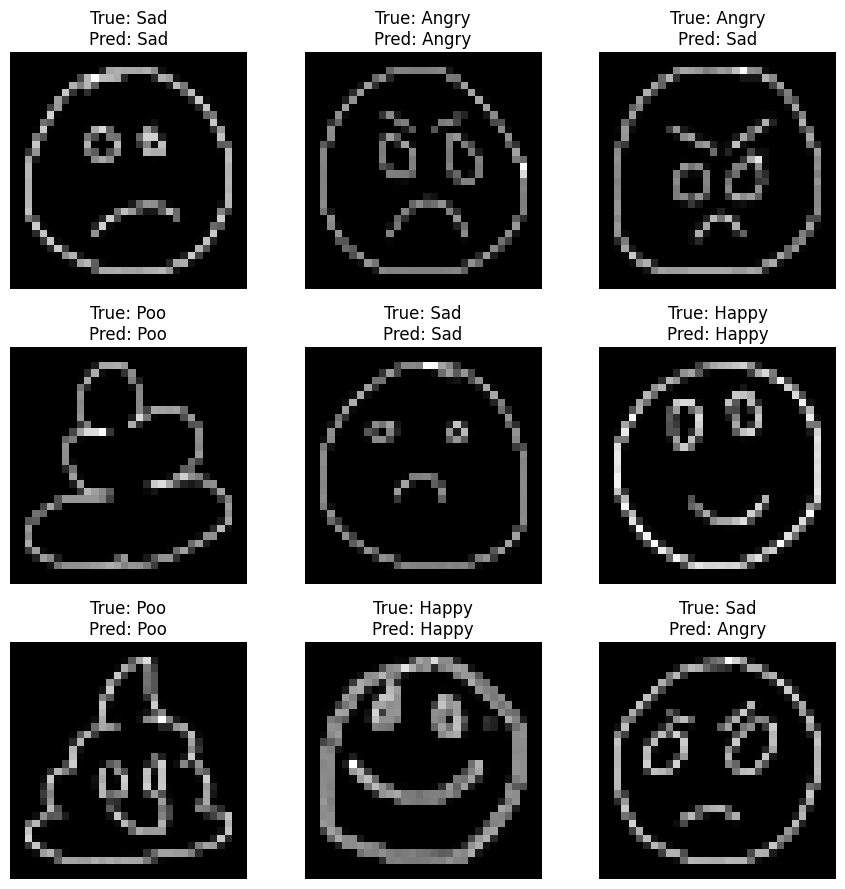

In [12]:
# Realizar predicciones con la CNN y mostrar algunas imágenes con sus predicciones
import matplotlib.pyplot as plt
fig, axes = plt.subplots(3, 3, figsize=(9, 9))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_test_cnn[i].reshape(32, 32), cmap='gray')
    ax.set_title(f'True: {labels[y_test[i]]}\nPred: {labels[y_pred_classes_cnn[i]]}')
    ax.axis('off')
plt.tight_layout()
plt.show()